Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        89
           1       0.38      0.42      0.40        48
           2       0.25      0.23      0.24        22
           3       0.08      0.06      0.07        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.28      0.29      0.28       182
weighted avg       0.48      0.50      0.49       182


Confusion Matrix:
 [[65 15  6  3  0]
 [17 20  5  4  2]
 [ 3 10  5  3  1]
 [ 4  8  3  1  1]
 [ 3  0  1  2  0]]


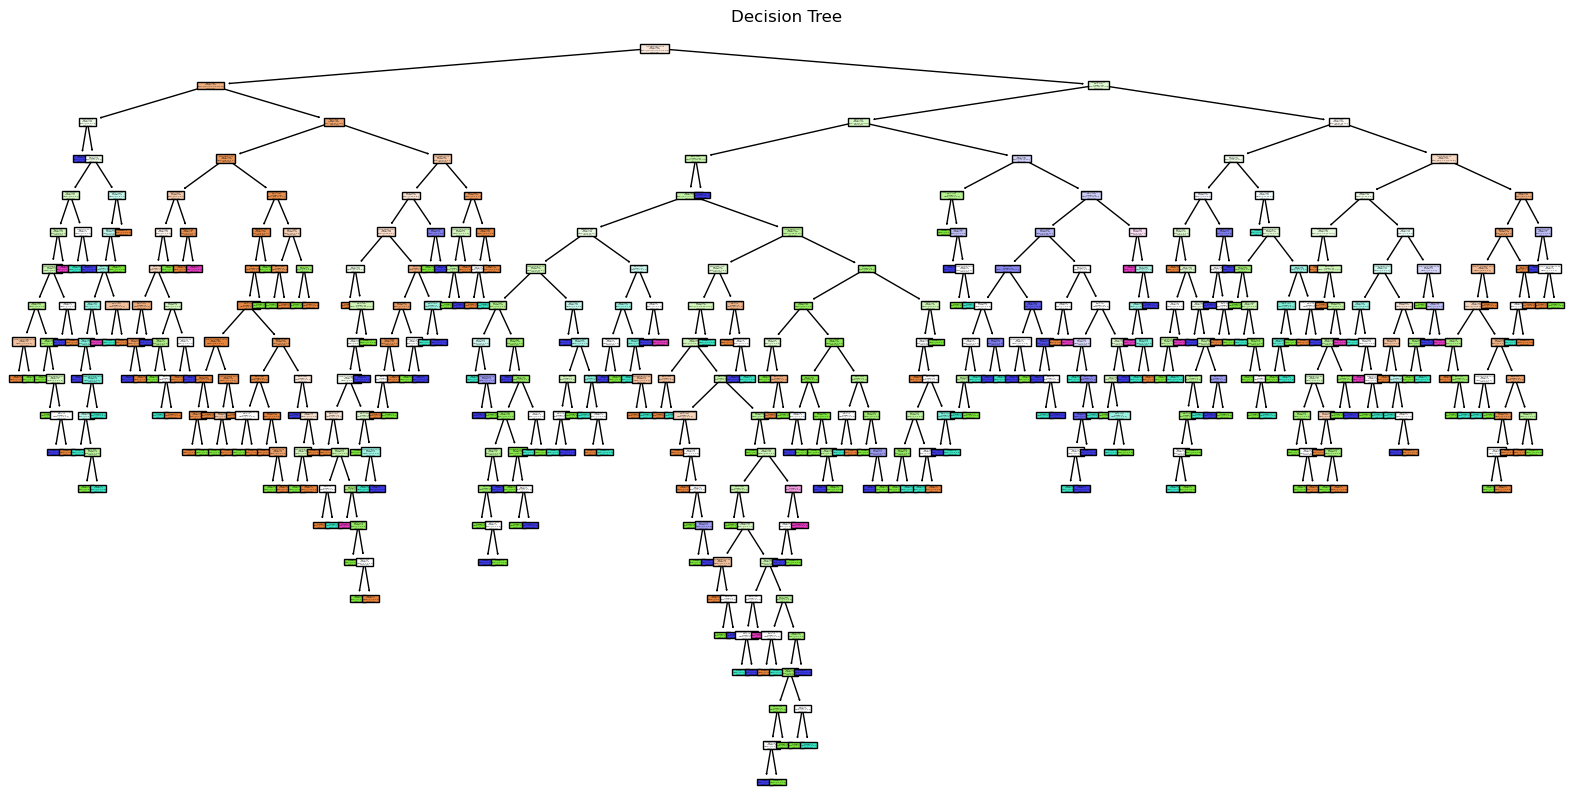

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset from the correct sheet
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

# Rename 'num' to 'target' for clarity
df.rename(columns={'num': 'target'}, inplace=True)

# Handle missing values if any
df.fillna(df.mean(numeric_only=True), inplace=True)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# One-hot encode categorical features (if needed)
X = pd.get_dummies(X)

# Split the dataset into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.show()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  target    908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

 First 5 rows:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   

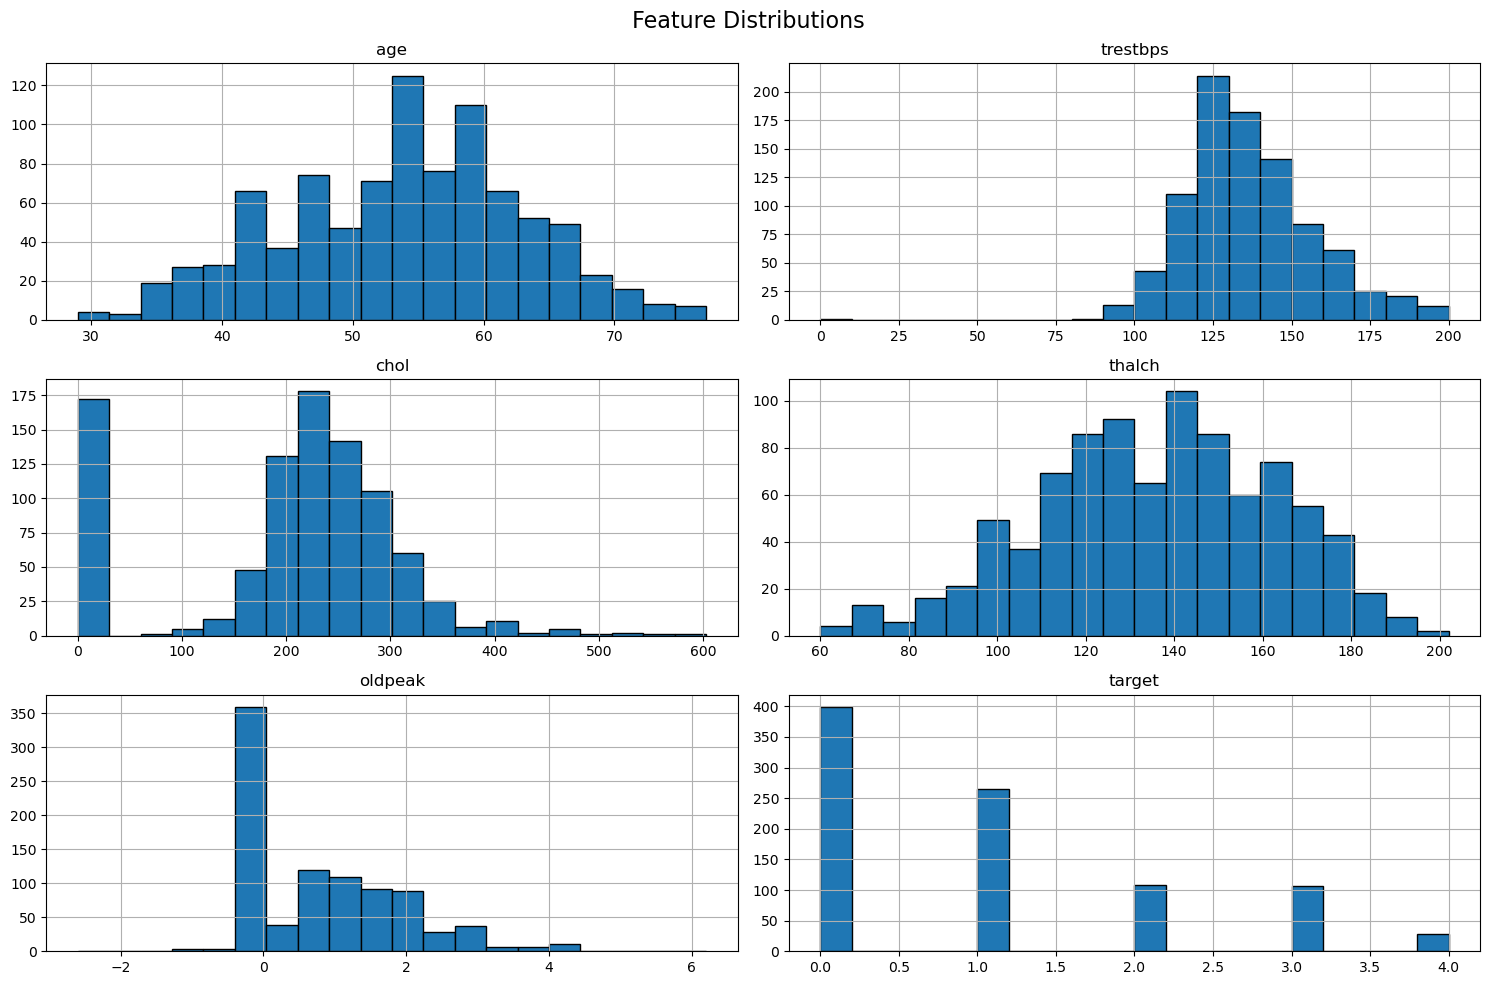

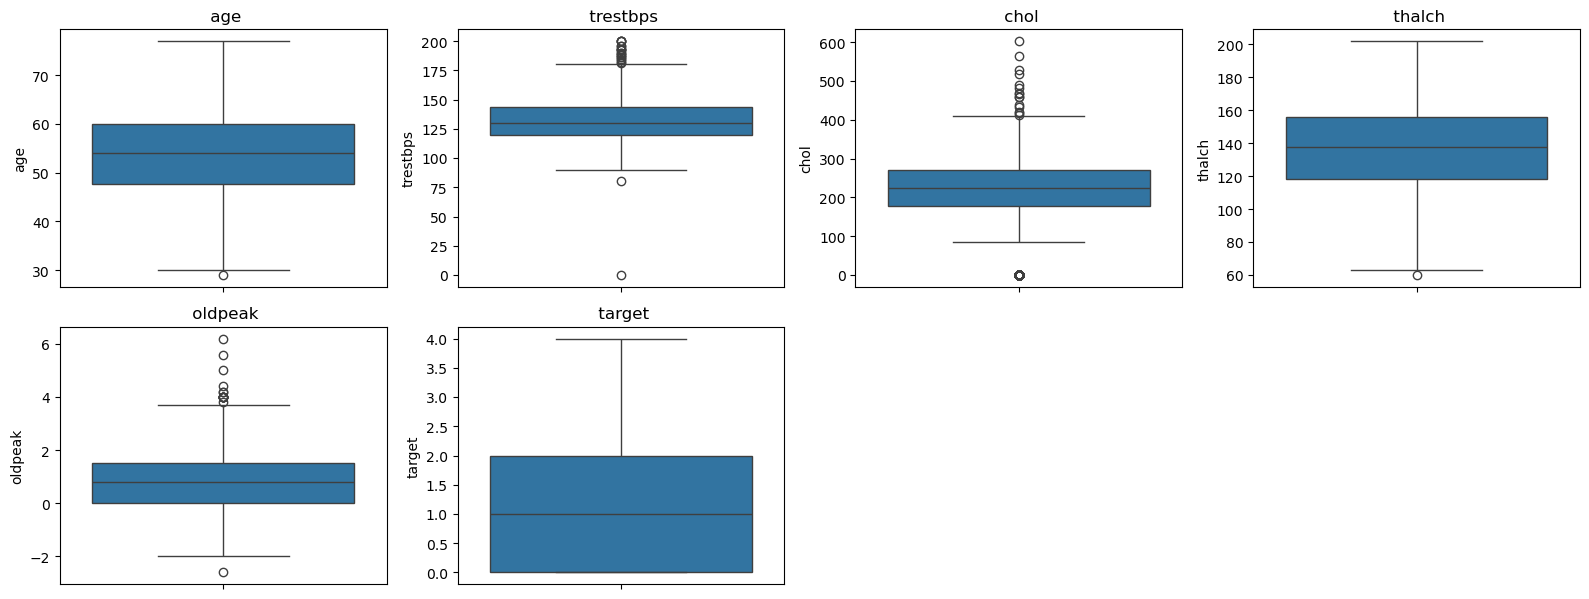

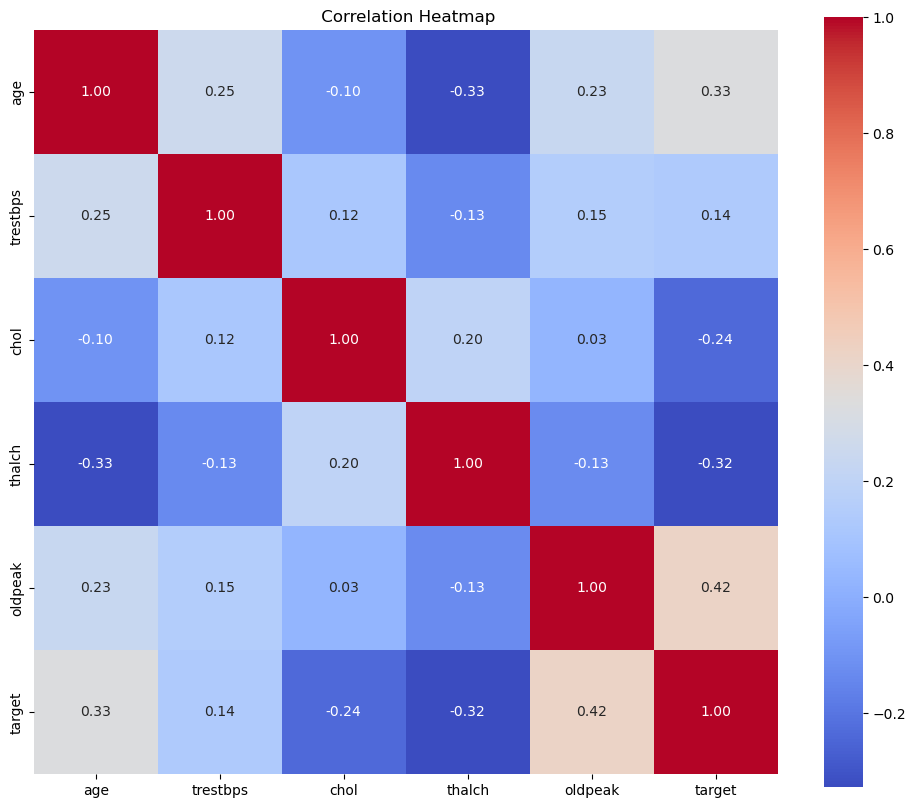

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure target column is renamed
df.rename(columns={'num': 'target'}, inplace=True)

# 1. Basic Information
print(" Dataset Info:")
print(df.info())

print("\n First 5 rows:")
print(df.head())

# 2. Summary Statistics
print("\n Statistical Summary:")
print(df.describe())

# 3. Check for Missing Values
print("\n Missing Values:")
print(df.isnull().sum())

# 4. Check for Duplicates
print("\n Duplicate Rows:", df.duplicated().sum())

# 5. Target Distribution
print("\n Target Class Distribution:")
print(df['target'].value_counts())

# 6. Histogram of All Numeric Features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle(" Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 7. Boxplots to Detect Outliers
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f" {col}")
plt.tight_layout()
plt.show()

# 8. Correlation Matrix
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(" Correlation Heatmap")
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Handle Missing Values (without chained assignment)
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# 3. Scale Numerical Features (safely excluding target)
target_col = 'num' if 'num' in df.columns else None
if target_col:
    numerical_cols = df.select_dtypes(include='number').drop(columns=[target_col]).columns
else:
    numerical_cols = df.select_dtypes(include='number').columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(" Feature Engineering complete. Final shape:", df.shape)


 Feature Engineering complete. Final shape: (908, 20)


In [38]:
# Fixing the target
y = df['target'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop(columns=['target'])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7472527472527473

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       137
           1       0.49      0.49      0.49        45

    accuracy                           0.75       182
   macro avg       0.66      0.66      0.66       182
weighted avg       0.75      0.75      0.75       182

ROC-AUC Score: 0.6605028386050283


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 1. Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Create a base model
dt = DecisionTreeClassifier(random_state=42)

# 3. Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# 4. Fit the model on training data
grid_search.fit(X_train, y_train)

# 5. Print best parameters
print("Best Parameters:", grid_search.best_params_)

# 6. Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 7. Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))



Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7197802197802198

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       137
           1       0.41      0.31      0.35        45

    accuracy                           0.72       182
   macro avg       0.60      0.58      0.59       182
weighted avg       0.70      0.72      0.71       182

ROC-AUC Score: 0.5825628548256285


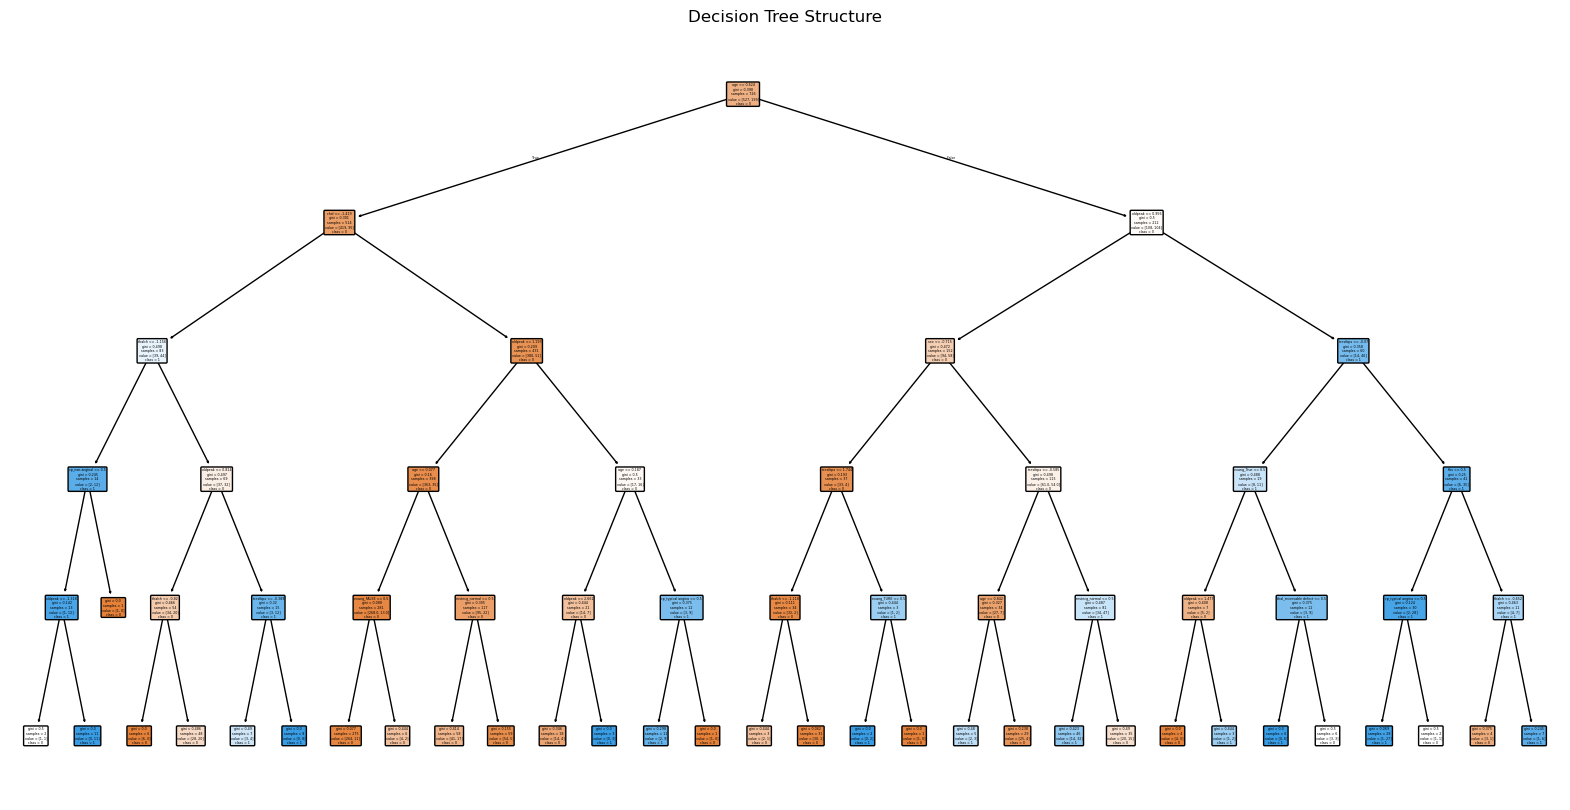

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True)
plt.title("Decision Tree Structure")
plt.show()


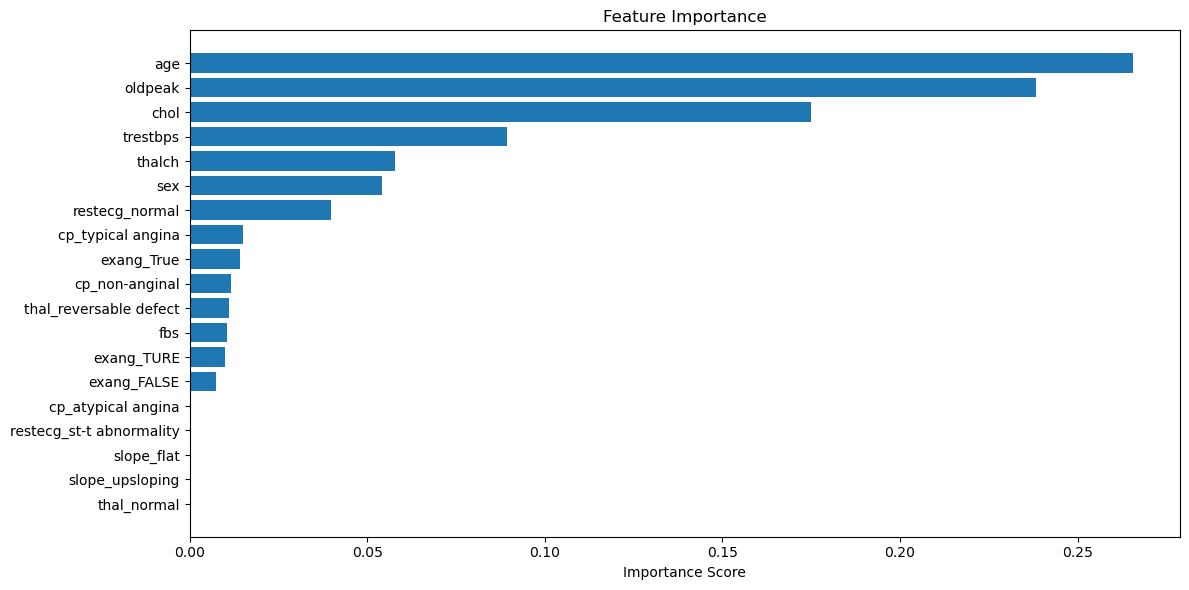

In [44]:
import pandas as pd
import numpy as np

# Get feature importance
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
# Model Evaluation and Analysis

# The tuned Decision Tree achieved around 71.9% accuracy. 
# It performed well on class 0 but struggled with class 1, as seen in the lower recall and precision. The ROC-AUC score (0.58) shows moderate performance. 
# The decision tree visualization and feature importance plot help us understand how the model makes decisions and which features matter most.